In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.tree import DecisionTreeClassifier

data = load_data('OJ')


data['Store7'] = [1 if d == 'Yes' else 0 for d in data['Store7']]
y = data['Purchase']
X = data.drop('Purchase', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

x_train

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
442,258,1,1.76,2.18,0.00,0.00,0,0,0.733760,2.18,1.76,0.42,0,0.000000,0.000000,0.42,1
464,265,7,1.86,2.13,0.37,0.00,1,0,0.733760,2.13,1.49,0.64,1,0.000000,0.198925,0.27,0
504,244,3,1.99,2.23,0.00,0.00,0,0,0.754240,2.23,1.99,0.24,0,0.000000,0.000000,0.24,3
732,276,4,2.09,2.09,0.20,0.40,0,0,0.320000,1.69,1.89,-0.20,0,0.191388,0.095694,0.00,4
388,233,2,1.69,1.69,0.00,0.00,0,0,0.105838,1.69,1.69,0.00,0,0.000000,0.000000,0.00,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,262,1,1.76,1.99,0.00,0.40,0,1,0.500000,1.59,1.76,-0.17,0,0.201005,0.000000,0.23,1
466,269,7,1.86,2.13,0.27,0.00,1,0,0.829606,2.13,1.59,0.54,1,0.000000,0.145161,0.27,0
121,261,1,1.76,1.99,0.00,0.00,0,0,0.967444,1.99,1.76,0.23,0,0.000000,0.000000,0.23,1
1044,241,1,1.86,1.99,0.00,0.30,0,1,0.777178,1.69,1.86,-0.17,0,0.150754,0.000000,0.13,1


# Feature Correlation

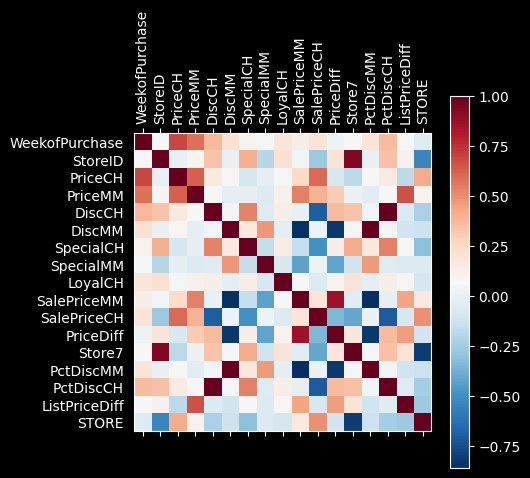

In [44]:
names = x_train.columns
df_features = pd.DataFrame(x_train, columns=names)

corr_mtx = df_features.corr(method='pearson')
plt.matshow(corr_mtx, cmap="RdBu_r")
plt.colorbar()

plt.xticks(range(len(names)), names, rotation=90)
plt.yticks(range(len(names)), names)
plt.grid(False)
plt.show()

## Metric Func


In [45]:
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay, \
    roc_curve, classification_report


def metrics(preds:np.ndarray, probs:np.ndarray, lables:np.ndarray, method:str):

    preds = [1 if p == 'CH' else 0 for p in preds]
    lables = [1 if l == 'CH' else 0 for l in lables]

    cf_mtx = confusion_matrix(lables, preds)
    fpr, tpr, thresholds = roc_curve(lables, probs)
    roc_area = roc_auc_score(lables, probs)
    accuracy = accuracy_score(lables, preds)

    print(classification_report(lables, preds))

    text = f"{roc_area=}\n{accuracy=}"

    cf_mtx_disp = ConfusionMatrixDisplay(confusion_matrix=cf_mtx)
    roc_disp = RocCurveDisplay(fpr=fpr,tpr=tpr)

    fig, (ax_report, ax_matrix, ax_roc) = plt.subplots(1, 3, figsize=(16, 4))
    ax_report.text(
        x=0.05,
        y=0.95,
        s=text,
        family='monospace',
        fontsize=16,
        verticalalignment='top',
        transform=ax_report.transAxes)
    ax_report.set_title(f'Metrics for {method}')
    ax_report.axis('off')

    ax_matrix.set_title("Confusion Matrix")
    ax_matrix.grid(False)
    ax_matrix = cf_mtx_disp.plot(ax=ax_matrix, cmap='grey')

    ax_roc.set_title('ROC Curve')
    ax_roc.plot(fpr,tpr, linewidth=2, label='ROC Curve', color='red')
    ax_roc.set_xlabel('False Positive Rate')
    ax_roc.set_ylabel('True Positive Rate')


    return {"accuracy": accuracy, "roc_score": roc_area}

# Fitting and Plotting a tree

In [46]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

##

### Results

              precision    recall  f1-score   support

           0       0.64      0.62      0.63       128
           1       0.75      0.77      0.76       193

    accuracy                           0.71       321
   macro avg       0.69      0.69      0.69       321
weighted avg       0.71      0.71      0.71       321



{'accuracy': 0.7071651090342679, 'roc_score': 0.6950089054404145}

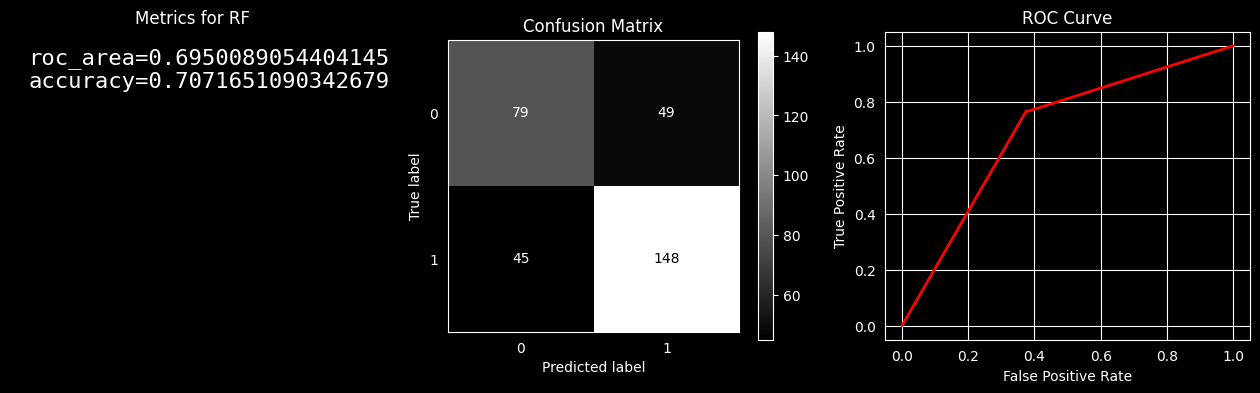

In [47]:
preds = model.predict(x_test)
probs = model.predict_proba(x_test)[:, 0]

metrics(preds, probs, y_test, method="RF")

## Plotting a tree

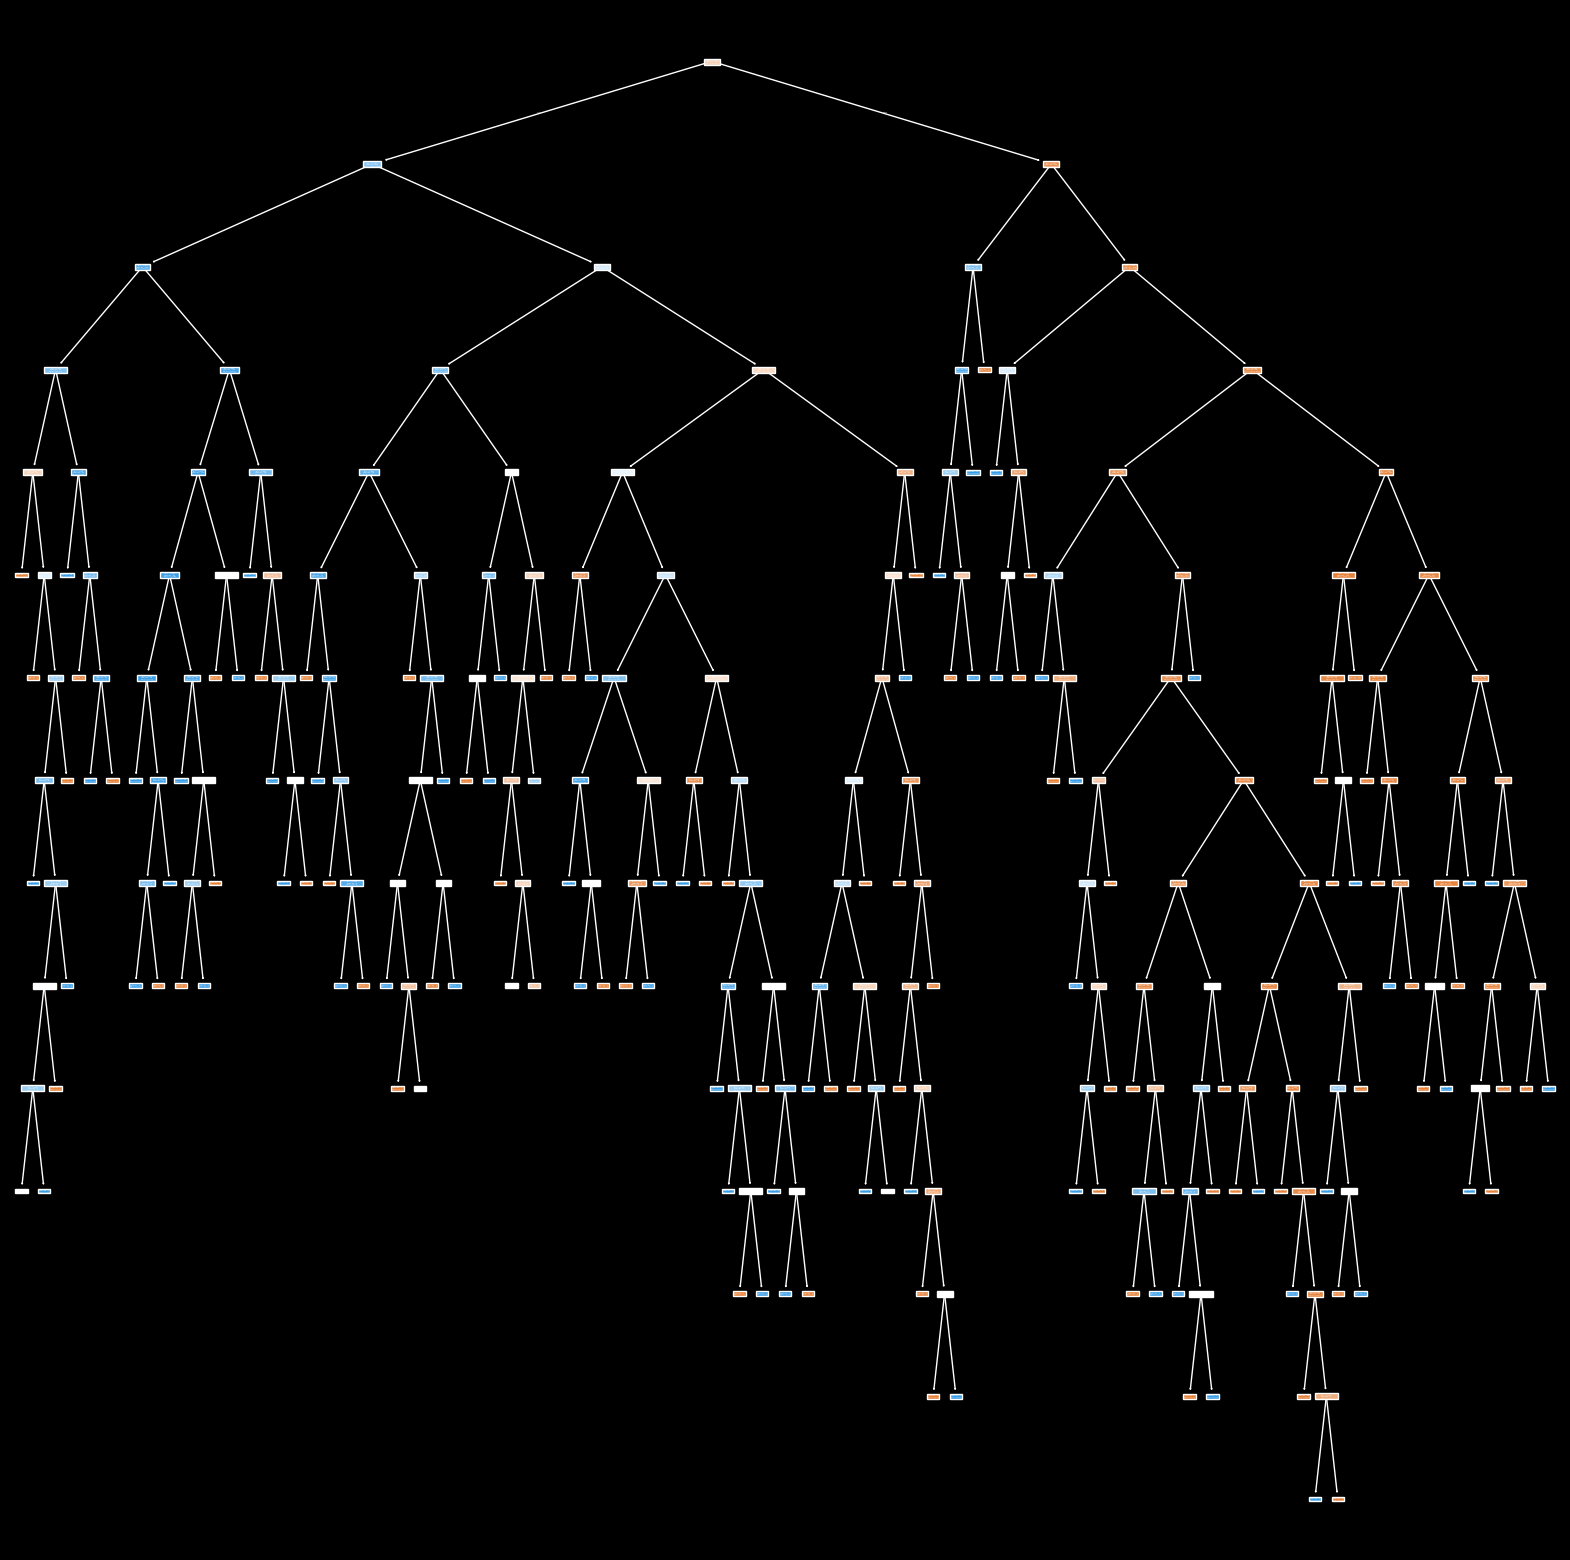

In [49]:
import matplotlib.pyplot as plt
from sklearn import tree
feature_names = x_train.columns


plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=feature_names, filled=True)
plt.show()

# Fit and plot a bit smaller tree